## Lab Report 2 - CLaSP 405-002 - Changes in Wintering Location of Birds in North America

## Adam Benson

This Jupyter notebook analyzes changes in the wintering location of birds in North America from 1966-2013. I will be analyzing the time-series data of changes in location from coast for all bird species along with individual bird species data. These data sets will help generate insights into the the impact of climate change on avian migrations.


The original data sets can be found here:

Wintering Locations: https://www.epa.gov/climate-indicators/climate-change-indicators-bird-wintering-ranges

 The original wintering location data set comes from the Climate Change Indicators section of the EPA website and contains information on the changes in wintering locations of 305 North American Bird Species. The datasets come as .csv format, which is easily converted to a pandas dataframe for further analysis. They key findings of the study were that the mean trend in all of the species was a movement northward which correlates with increasing winter temperatures. Not all species moved the same, however, and 27% of the 305 species actually shifted southward.

Avian Data: http://www.audubon.org/sites/default/files/documents/appendix.pdf

The original avian data set comes from the National Audobon Society's Birds and Climate Technical Report. This report also contains information on the changes in wintering locations of 305 North American Bird Species. The purposes of the report were to determine if birds have exhibited continent-wide latitudinal
shifts in their distribution within a relatively short ecological time period of 40 years and to investigate the correlation between climate change and distribution changes. Ultimately, the study concluded that, amongst birds, there was a strong northern shift in latitudinal center of abundance over the past 40 years.

In [21]:
#Adam Benson
#Climate and Space Sciences Engineering 405-002
#Lab Report Two
#1/26/2018

### Import Statements

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt #module that supplies classes for manipulating dates and times
import matplotlib.pyplot as plt
import matplotlib.dates as mdt #provides date plotting cabalities using datetime
#So that visualizations are output in Jupyter notebook
%matplotlib inline 

### Bird Species Data

In [2]:
#Creating a pandas dataframe for bird species
birdSpecies = pd.read_csv('./Data/birdSpecies.csv', header = 2) #In birdSpecies.csv,the header is 2 
birdSpecies['Plot Color'] = 'b' #Creating a column for colors with the default set to blue
#Checking to make sure column exists
#print(birdSpecies.columns) 
#Printing out the 78th index, 'Bald Eagle, to check data loaded properly in dataframe
print('\n', birdSpecies.loc[78]) 


 Species                                                             Bald Eagle
Scientific_name                                       Haliaeetus leucocephalus
Habitat Guild (3 classes)                                      wetland/aquatic
Habitat Guild (5 classes)                                      wetland/aquatic
Feeder use                                                        rarely/never
Mean latitude (40-year ave from regression)                              47.83
Latitudinal distance moved (miles)                                       -47.1
Lat. direction moved                                                         S
F-value latitude slope                                                   21.22
p-value slope                                                          <0.0001
Mean dist. from coast (40-yr ave. from regression)                       340.4
Change in mean dist. from coast (miles)                                   74.2
Shifted inland or to coast                        

In [8]:
awayFromCoastMask = birdSpecies['Change in mean dist. from coast (miles)'] > 0
birdSpecies.loc[awayFromCoastMask, 'Plot Color'] = 'g'
print(len(birdSpecies))

#plt.scatter(birdSpecies['Habitat Guild (5 classes)'], birdSpecies['Change in mean dist. from coast (miles)'])

305


In [4]:
y = birdSpecies.loc[awayFromCoastMask]

In [7]:
print(len(y))
y.head()

191


,Species,Scientific_name,Habitat Guild (3 classes),Habitat Guild (5 classes),Feeder use,Mean latitude (40-year ave from regression),Latitudinal distance moved (miles),Lat. direction moved,F-value latitude slope,p-value slope,...,Change in mean dist. from coast (miles),Shifted inland or to coast,F-value slope dist. to coast,p-value slope dist. to coast,# state or province strata,40-year Median Trend (% change per year),95% LCI Trend,95% UCI Trend,% of hemispheric range in CBC survey area,Plot Color
1,Snow Goose,Chen caerulescens,wetland/aquatic,wetland/aquatic,rarely/never,33.14,217.1,N,165.80,<0.0001,...,149.2,inland,99.44,<0.0001,51,7.3,5.1,9.5,84.7,g
2,Ross's Goose,Chen rossii,wetland/aquatic,wetland/aquatic,rarely/never,34.68,-52.3,S,88.85,<0.0001,...,48.4,inland,3.06,0.0881,29,15.8,12.7,18.8,75.7,g
4,"""Canada"" Goose (lumped)",NaN,wetland/aquatic,wetland/aquatic,occasionally,41.03,119.9,N,79.24,<0.0001,...,281.5,inland,821.83,<0.0001,55,11.0,9.6,12.7,93.8,g
5,Mute Swan,Cygnus olor,wetland/aquatic,wetland/aquatic,rarely/never,43.52,-122.9,S,111.90,<0.0001,...,234.4,inland,1056.23,<0.0001,32,8.8,7.3,10.0,95.2,g
6,Trumpeter Swan,Cygnus buccinator,wetland/aquatic,wetland/aquatic,rarely/never,52.23,-36.4,S,14.57,0.0005,...,28.8,inland,15.87,0.0003,25,12.1,10.1,14.3,90.6,g


### Aggregate Bird Movement from Coast

In [8]:
# Creating a pandas dataframe for average of all coastal bird ranges
# Header is set to 6 because first 6 lines are information about the dataset
coastalBirdRanges = pd.read_csv('./Data/birdRangesCoastal_40yearAvrg.csv', header = 6)
# Changing the index to datetime objects so that data can be located based on a given date 
coastalBirdRanges.index = pd.to_datetime(coastalBirdRanges['year'], infer_datetime_format = False,
                                         format = '%Y')
#print first 3 rows to check that the file was correctly loaded as PD Dataframe
print(coastalBirdRanges.head(n=3)) 
#plt.plot(coastalBirdRanges['year'], coastalBirdRanges['mean distance (miles)'])

            year  mean distance (miles)  lower confidence (miles)  \
year                                                                
1966-01-01  1966               0.000000                   0.00000   
1967-01-01  1967              -1.579041                  -3.19501   
1968-01-01  1968              -1.873745                  -3.56797   

            upper confidence (miles)  
year                                  
1966-01-01                  0.000000  
1967-01-01                  0.036929  
1968-01-01                 -0.179520  


## Avian Wintering Locations Visualization

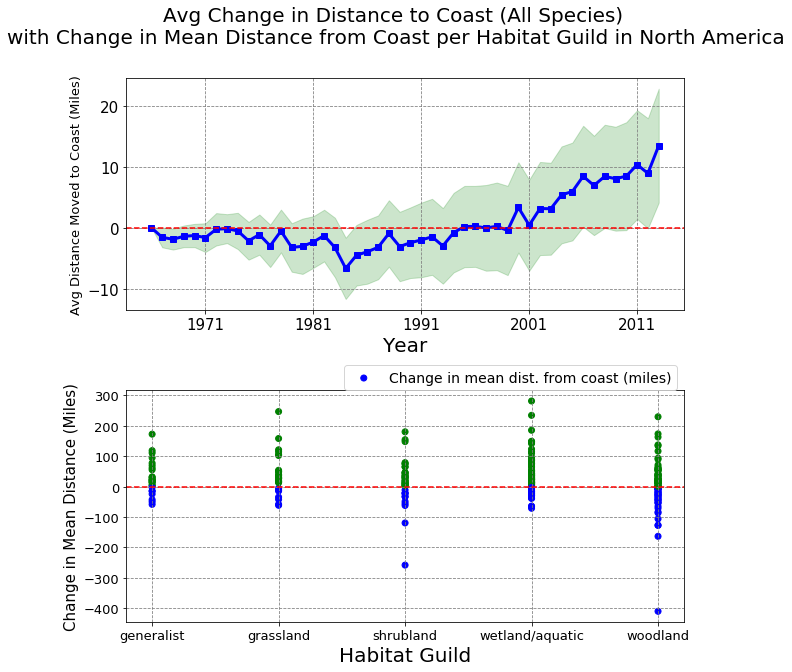

In [9]:
# Specifying dimensions of figure to fit in notebook well
birdChart = plt.figure(figsize=(10,10))

# Creating title for visualization
birdChart.suptitle('Avg Change in Distance to Coast (All Species) \n' +
                   'with Change in Mean Distance from Coast per Habitat Guild' +
                   ' in North America', fontsize=20)

#specifies the geometry of the grid that a subplot will be placed
#parameters = nrows, ncols, wspace=, hspace=
multiPlot = plt.GridSpec(2, 1, hspace=0.35)

#Partitioning the first row of the grid to the top chart
avgDistanceMovedChart = birdChart.add_subplot(multiPlot[0,:]) 
#Partitioning the second row of the grid to the bottom chart
habitatGuildChart = birdChart.add_subplot(multiPlot[1,:]) 
#################################################################
# Top Chart Visualization#
#################################################################
# Creating a line plot to chart the average distance moved in all bird series from the coast during 1966-2013
avgDistanceMovedChart.plot(coastalBirdRanges.index.to_pydatetime(),
                           coastalBirdRanges['mean distance (miles)'],
                           lw=3, marker='s', color= 'b') 

# Creating an error envelope to plot the confidence with which each measurement was made.
# This is a more accurate representation of the data
# Using a different background color, green, for the error envelope to aid visualization.
avgDistanceMovedChart.fill_between(coastalBirdRanges.index.to_pydatetime(),
                                   coastalBirdRanges['upper confidence (miles)'],
                                   coastalBirdRanges['lower confidence (miles)'],
                                   color='g', alpha=0.2 #alpha of 0.2 makes the error envelope secondary.
                                  )

# add a horizontal line at 0 because some values are negative
avgDistanceMovedChart.axhline(y=0.0, color='r', linestyle='--')                  
# Making a grid to aid visualization
avgDistanceMovedChart.grid(color='gray', linestyle='dashed') 
# Make X Axis label readable.
avgDistanceMovedChart.set_xlabel('Year', fontsize = 20)  
# Make Y Axis label readable.
avgDistanceMovedChart.set_ylabel('Avg Distance Moved to Coast (Miles)', fontsize = 13) 
# Increasing size of axis ticks.
avgDistanceMovedChart.tick_params(labelsize=15) 

#################################################################
# Habitat Guild Visualization #
#################################################################
# Creating a scatter plot to represent the change in mean distance from coast in all bird species
# Species are organized according to the habitat guild to which they belong (out of 5 not 3)

# Green values will represent a movement away from the coast
# while blue values represent a movement toward coast.
habitatGuildChart.scatter(birdSpecies['Habitat Guild (5 classes)'],
            birdSpecies['Change in mean dist. from coast (miles)'],
            color=birdSpecies['Plot Color'])

habitatGuildChart.set_ylabel('Change in Mean Distance (Miles)', fontsize = 15)

habitatGuildChart.set_xlabel('Habitat Guild', fontsize = 20)

habitatGuildChart.grid(color='gray', linestyle='dashed')

habitatGuildChart.tick_params(labelsize=13)
#add a dashed horizontal line at 0 because some values are negative
habitatGuildChart.axhline(y=0.0, color='r', linestyle='dashed') 

#Adding a legend to show what values represent
habitatGuildChart.legend(bbox_to_anchor=(1, 1.14), prop={'size':14})

plt.show()

### Analysis

 For my visualization, I wanted to examine the change in the mean distance from the coast for each of the five different habitat guilds included in the dataset and compare it to the average change in all of the species. To do this, I created a multiplot grid consisting of a line chart with an error envelope and a color coded scatter plot. Because each of the charts contains negative values, I also included horizontal lines at y=0. In the scatter plot, green values represent a movement away from the coast while blue values signal a movement towards the coast. Clearly, not all of the habitat guilds demonstrate a clear pattern of movement. The woodland and shrubland guilds in particular exhibit seemingly symetrical movement both to and away from the coast. This observation concurs with the orginal data sets conclusion that not all species moved the same and that some actually shifted southward.